In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [120]:
path="./data/"
files=os.listdir(path)

list=[]

for filename in files:
    print(filename)
    df_temp=pd.read_csv(path+filename)#, encoding="shift-jis"
    df_temp['filename']=filename
    list.append(df_temp)
#df_2016=pd.concat(list,sort=False)
df=pd.concat(list,sort=False)
df=df.drop("index", axis=1)

20180214_Newyork.csv
20180324_Miami.csv
20180514_Rome.csv
20180527_French.csv
20180618_Halle.csv
20180703_Winbledon.csv
20180807_Toronto.csv
20180829_USOpen.csv
20180919_Metz.csv
20181008_Shanghai.csv
20181023_Vienna.csv
20181112_ATPFinals.csv
20190102_Brisben.csv
20190213_Rotterdam.csv
20190311_IndianWells.csv
20190323_Miami.csv
20190423_Barcelona.csv
20190702_Wimbledon.csv
20190814_Cincinnati.csv
20190826_USOpen.csv


In [121]:
df

,Unnamed: 0,Tournament,OpponentPlayer,Set,TotalGame,Server,WinLose,FirstSecond,Cource,Speed,AceDbF,ScoreServer,ScoreReturner,Side,WonA,WonB,filename
0,0.0,201802ニューヨーク,ケビン・アンダーソン,1.0,1,下,×,1,w,294.0,NaN,0,0,Deuce,0,1,20180214_Newyork.csv
1,1.0,201802ニューヨーク,ケビン・アンダーソン,1.0,1,下,×,2,w,140.0,NaN,0,15,Ad,0,1,20180214_Newyork.csv
2,2.0,201802ニューヨーク,ケビン・アンダーソン,1.0,1,下,×,1,c,NaN,Ac,0,30,Deuce,0,1,20180214_Newyork.csv
3,3.0,201802ニューヨーク,ケビン・アンダーソン,1.0,1,下,○,2,w,138.0,NaN,0,40,Ad,1,0,20180214_Newyork.csv
4,4.0,201802ニューヨーク,ケビン・アンダーソン,1.0,1,下,○,2,w,170.0,NaN,15,40,Deuce,1,0,20180214_Newyork.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NaN,201908全米オープン,トゥルンゲリティ,2.0,5,圭,○,2,b,143.0,NaN,40,30,Ad,1,0,20190826_USOpen.csv
498,NaN,201908全米オープン,トゥルンゲリティ,2.0,6,鶴,○,1,c,175.0,NaN,0,0,Deuce,1,0,20190826_USOpen.csv
499,NaN,201908全米オープン,トゥルンゲリティ,2.0,6,鶴,×,1,w,167.0,NaN,15,0,Ad,0,1,20190826_USOpen.csv
500,NaN,201908全米オープン,トゥルンゲリティ,2.0,6,鶴,○,1,w,NaN,NaN,15,15,Deuce,1,0,20190826_USOpen.csv


In [122]:
#wl列を追加　〇⇒1 ×⇒0

df.loc[df['WinLose']=="○",'wl']=1
df.loc[df['WinLose']=="×",'wl']=0
df['wl']

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
497    1.0
498    1.0
499    0.0
500    1.0
501    1.0
Name: wl, Length: 7607, dtype: float64

In [124]:
df['wl'].value_counts()

1.0    3821
0.0    3786
Name: wl, dtype: int64

In [127]:
df.reset_index()
df_kei=df[df["Server"]=="圭"]


df_kei_1st=df_kei[df_kei["FirstSecond"]=="1"]
df_kei_1st=df_kei_1st[df_kei_1st['Speed']>100]
df_kei_1st=df_kei_1st[df_kei_1st['Speed']<250]

df_kei_1st_deuce=df_kei_1st[df_kei_1st["Side"]=="Deuce"]
df_kei_1st_ad=df_kei_1st[df_kei_1st["Side"]=="Ad"]

df_kei_1st_deuce_w=df_kei_1st_deuce[df_kei_1st_deuce["Cource"]=='w']
df_kei_1st_ad_w=df_kei_1st_ad[df_kei_1st_ad["Cource"]=='w']

df_kei_1st_ad_w_won=df_kei_1st_ad_w[df_kei_1st_ad_w['WinLose']=="○"]
df_kei_1st_ad_w_lost=df_kei_1st_ad_w[df_kei_1st_ad_w['WinLose']=="×"]

In [159]:
df_kei_1st_ad_w_won

,Unnamed: 0,Tournament,OpponentPlayer,Set,TotalGame,Server,WinLose,FirstSecond,Cource,Speed,AceDbF,ScoreServer,ScoreReturner,Side,WonA,WonB,filename,wl
41,41.0,201802ニューヨーク,ケビン・アンダーソン,2.0,1,圭,○,1,w,173.0,NaN,30,40,Ad,1,0,20180214_Newyork.csv,1.0
43,43.0,201802ニューヨーク,ケビン・アンダーソン,2.0,1,圭,○,1,w,186.0,NaN,40,Ad,Ad,1,0,20180214_Newyork.csv,1.0
66,66.0,201802ニューヨーク,ケビン・アンダーソン,2.0,5,圭,○,1,w,183.0,NaN,15,30,Ad,1,0,20180214_Newyork.csv,1.0
68,68.0,201802ニューヨーク,ケビン・アンダーソン,2.0,5,圭,○,1,w,183.0,NaN,40,30,Ad,1,0,20180214_Newyork.csv,1.0
113,113.0,201802ニューヨーク,ケビン・アンダーソン,3.0,4,圭,○,1,w,157.0,NaN,30,15,Ad,1,0,20180214_Newyork.csv,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,NaN,201908全米オープン,クラーン,4.0,3,圭,○,1,w,165.0,NaN,0,15,Ad,1,0,20190826_USOpen.csv,1.0
387,NaN,201908全米オープン,クラーン,4.0,5,圭,○,1,w,159.0,NaN,30,15,Ad,1,0,20190826_USOpen.csv,1.0
440,NaN,201908全米オープン,トゥルンゲリティ,1.0,2,圭,○,1,w,159.0,NaN,15,0,Ad,1,0,20190826_USOpen.csv,1.0
446,NaN,201908全米オープン,トゥルンゲリティ,1.0,2,圭,○,1,w,168.0,NaN,Ad,40,Ad,1,0,20190826_USOpen.csv,1.0


In [160]:
df_kei_1st_ad_w_lost

,Unnamed: 0,Tournament,OpponentPlayer,Set,TotalGame,Server,WinLose,FirstSecond,Cource,Speed,AceDbF,ScoreServer,ScoreReturner,Side,WonA,WonB,filename,wl
7,7.0,201802ニューヨーク,ケビン・アンダーソン,1.0,2,圭,×,1,w,162.0,NaN,15,0,Ad,0,1,20180214_Newyork.csv,0.0
15,15.0,201802ニューヨーク,ケビン・アンダーソン,1.0,4,圭,×,1,w,167.0,NaN,0,15,Ad,0,1,20180214_Newyork.csv,0.0
19,19.0,201802ニューヨーク,ケビン・アンダーソン,1.0,4,圭,×,1,w,178.0,NaN,30,40,Ad,0,1,20180214_Newyork.csv,0.0
28,28.0,201802ニューヨーク,ケビン・アンダーソン,1.0,6,圭,×,1,w,162.0,NaN,30,15,Ad,0,1,20180214_Newyork.csv,0.0
64,64.0,201802ニューヨーク,ケビン・アンダーソン,2.0,5,圭,×,1,w,180.0,NaN,15,0,Ad,0,1,20180214_Newyork.csv,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,NaN,201908全米オープン,アレックス・デ=ミノー,4.0,9,圭,×,1,w,160.0,NaN,30,40,Ad,0,1,20190826_USOpen.csv,0.0
279,NaN,201908全米オープン,クラーン,2.0,6,圭,×,1,w,180.0,NaN,15,0,Ad,0,1,20190826_USOpen.csv,0.0
283,NaN,201908全米オープン,クラーン,2.0,6,圭,×,1,w,151.0,NaN,40,30,Ad,0,1,20190826_USOpen.csv,0.0
295,NaN,201908全米オープン,クラーン,2.0,8,圭,×,1,w,177.0,NaN,30,40,Ad,0,1,20190826_USOpen.csv,0.0


In [111]:
df_kei_1st_ad_w['wl'].value_counts()#374 260 114

1.0    285
0.0    134
Name: wl, dtype: int64

In [112]:
df_aug1=df_kei_1st_ad_w[df_kei_1st_ad_w['wl']==0.0].sample(frac=1, random_state=0)

In [163]:
df_temp=pd.concat([df_kei_1st_ad_w,df_aug1])
df_temp['wl'].value_counts()

1.0    285
0.0    268
Name: wl, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#df_temp=pd.concat([df_kei_1st_ad_w,df_aug1])
df_temp=df_kei_1st_ad_w

X=df_temp[['Speed']]
Y=df_temp['wl']#.as_matrix()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

C:\Users\taku\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.00568971]]
intercept =  [-0.30368902]


In [192]:
285/(134+285)

0.6801909307875895

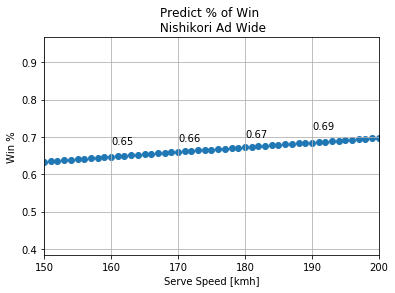

In [200]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x=[]
y=[]
for i in range(500):
    x.append(i)
    y.append(sigmoid(lr.coef_*i+lr.intercept_))

plt.scatter(x,y)
plt.xlim([150,200])
plt.grid()
plt.ylabel("Win %")
plt.xlabel("Serve Speed [kmh]")

plt.title("Predict % of Win \n Nishikori Ad Wide")

plt.text(160,0.68,"0.65")
plt.text(170,0.69,"0.66")
plt.text(180,0.70,"0.67")
plt.text(190,0.72,"0.69")

plt.savefig("predict.png")

In [197]:
sigmoid(lr.coef_*180+lr.intercept_)

array([[0.67270798]])

In [195]:
sigmoid(lr.coef_*170+lr.intercept_)

array([[0.66005996]])

In [55]:
print(len(x),len(y))

250 250


In [ ]:
x

In [118]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))


accuracy =  0.43243243243243246


In [30]:
Y

14     0.0
18     1.0
25     1.0
27     1.0
36     1.0
      ... 
465    1.0
475    0.0
483    1.0
492    1.0
494    1.0
Name: wl, Length: 894, dtype: float64

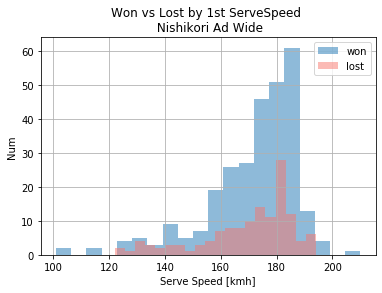

In [198]:
df_kei_1st_ad_w_won['Speed'].hist(bins=20, alpha=.5,label="won")
df_kei_1st_ad_w_lost['Speed'].hist(bins=20,color="#F8766D", alpha=.5,label="lost")
plt.ylabel("Num")
plt.xlabel("Serve Speed [kmh]")
plt.legend()
plt.title("Won vs Lost by 1st ServeSpeed \n Nishikori Ad Wide")

plt.savefig("wonlost.png")
